In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class IrisModel(nn.Module):
    # Input Layer (in_features) -> 4 features of the flower: sepal.length, sepal.width, petal.length, petal.width
    # Hidden Layer 1 (h1) number of nerons --> Hidden Layer 2 (h2) number of neurons --> Hidden Layer 3 (number of neurons)
    # Ouput Layer (out_features) -> 3 types of flowers (Setosa, Versicolor, Virginica)

    def __init__(self, in_features=4, h1=8, h2=9, h3=11, out_features=3) -> None:
        super(IrisModel, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, out_features)
      

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.relu(self.fc3(x))
      x = self.out(x)

      return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(69)

# Instantiate Model
irisModel: IrisModel = IrisModel()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
# Change the last column from strings to integers
df["variety"] = df["variety"].replace("Setosa", 0)
df["variety"] = df["variety"].replace("Versicolor", 1)
df["variety"] = df["variety"].replace("Virginica", 2)

df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
# Train, Test, Split, set X and y
X = df.drop("variety", axis=1)
y = df["variety"]

In [8]:
# Convert X and y to numpy arrays
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [21]:
# Convert X features to torch float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [22]:
# Convert y features to torch long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate
optimizer = torch.optim.Adam(irisModel.parameters(), lr=0.01)

In [25]:
# Training the model
# epoch = 1 iteration through all the training data
epochs = 100
losses = []

for i in range(epochs):
			# Go forward and get a predicion
			y_pred = irisModel.forward(X_train)

			# Measure the loss/error, gonna be high at first
			loss = criterion(y_pred, y_train)

			# Keep track of the losses
			losses.append(loss.detach().numpy())

			# Print loss every 10 epochs
			if i % 10 == 0:
				print(f'epoch: {i}, loss: {loss}')

			# Do some back propagation: take the error rate of forward propagation and feed it back
			# thru the network to fine tune the weights
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()

epoch: 0, loss: 1.0768150091171265
epoch: 10, loss: 0.8193885684013367
epoch: 20, loss: 0.43449047207832336
epoch: 30, loss: 0.2577800154685974
epoch: 40, loss: 0.13850714266300201
epoch: 50, loss: 0.10053948312997818
epoch: 60, loss: 0.08550868928432465
epoch: 70, loss: 0.07509179413318634
epoch: 80, loss: 0.06818916648626328
epoch: 90, loss: 0.06337330490350723


Text(0.5, 0, 'Epoch')

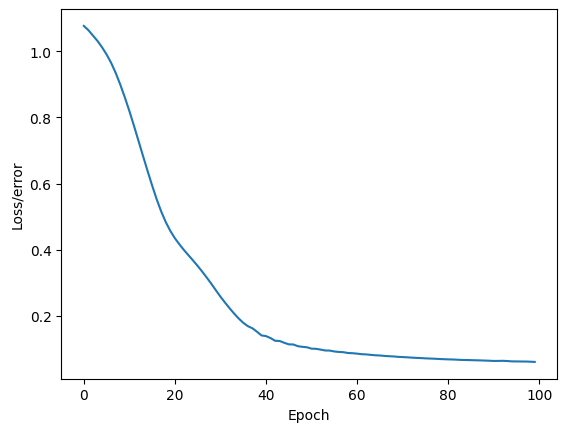

In [26]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")

In [27]:
# Evaluate the model on a test dataset
with torch.no_grad(): # Turn off back propagation
    y_eval = irisModel.forward(X_test) # X_test = features(4), y_eval = predictions
    loss = criterion(y_eval, y_test) # Calculate Loss

In [28]:
loss

tensor(0.0086)

In [34]:
correct = 0

with torch.no_grad():
			for i, data in enumerate(X_test):
				y_val = irisModel.forward(data)

				if y_test[i] == 0:
					x = "Setosa"
				elif y_test[i] == 1:
					x = "Versicolor"
				else:
					x = "Virginica"

				# Will tell us what type of flower class our network thinks it is
				print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

				# Correct or not
				if y_val.argmax().item() == y_test[i]:
					correct +=1
				
print(f"We got {correct} correct!")

1.)  tensor([ 10.7865,   1.8161, -19.4444]) 	 0 	 0
2.)  tensor([-5.2196,  7.9779, -0.3971]) 	 1 	 1
3.)  tensor([ 10.6736,   2.1066, -19.4487]) 	 0 	 0
4.)  tensor([-14.6117,   5.3332,  15.2400]) 	 2 	 2
5.)  tensor([ 10.6956,   1.9578, -19.4129]) 	 0 	 0
6.)  tensor([ 12.0458,   1.8686, -21.6416]) 	 0 	 0
7.)  tensor([-5.4506,  6.9490,  0.8519]) 	 1 	 1
8.)  tensor([-14.8708,   6.8807,  14.2018]) 	 2 	 2
9.)  tensor([-11.9332,   7.7028,   9.3218]) 	 2 	 2
10.)  tensor([ 11.5429,   1.8981, -20.7890]) 	 0 	 0
11.)  tensor([-11.1167,   6.2762,   9.4831]) 	 2 	 2
12.)  tensor([-17.6374,   7.0664,  17.9319]) 	 2 	 2
13.)  tensor([  9.2936,   1.7537, -16.8400]) 	 0 	 0
14.)  tensor([-6.0765,  7.4054,  1.2922]) 	 1 	 1
15.)  tensor([-12.8185,   6.5560,  11.6004]) 	 2 	 2
16.)  tensor([-6.5495,  7.4483,  1.9503]) 	 1 	 1
17.)  tensor([-2.2391,  6.7851, -3.3434]) 	 1 	 1
18.)  tensor([-15.8195,   6.1068,  16.2397]) 	 2 	 2
19.)  tensor([-4.1065,  7.2268, -1.2323]) 	 1 	 1
20.)  tensor([-13.21

In [48]:
# Testing my Model against random tensors that are close to each iris type
setosa_iris = torch.tensor([5.5, 3.1, 1.1, 0.4])
versicolor_iris = torch.tensor([6.5, 3.1, 5, 1.2])
virginica_iris = torch.tensor([7, 2.9, 6, 1.5])

iris_tensor_list = [setosa_iris, versicolor_iris, virginica_iris]

with torch.no_grad():
	for iris_tensor in iris_tensor_list:
		prediction = irisModel.forward(iris_tensor).argmax().item()
		if prediction == 0:
			print("Setosa")
		elif prediction == 1:
			print("Versicolor")
		else:
			print("Virginica")

Setosa
Versicolor
Virginica


In [41]:
# Save NN Model
torch.save(irisModel.state_dict(), "my_iris_model.pt")

In [43]:
# Load the Model
new_iris_model = IrisModel()
new_iris_model.load_state_dict(torch.load("my_iris_model.pt"))

<All keys matched successfully>

In [44]:
# Check if it loaded correctly
new_iris_model.eval()

IrisModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=11, bias=True)
  (out): Linear(in_features=11, out_features=3, bias=True)
)